In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import feature_selection as fs
import numpy as np
from sklearn.decomposition import PCA
from sklearn import tree
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Preprocessing

In [3]:
#載入資料
data = pd.DataFrame(pd.read_csv('bodyPerformance.csv'))

#切割feature以及class
#處理非數值特徵
#丟棄gender及class
mid1 = data.drop(['gender','class'], axis=1)
#將gender"向量化"
mid2 = pd.get_dummies(data.gender)
test = pd.concat([mid2,mid1], axis=1)

#標準化資料
sc = StandardScaler()
test_std = sc.fit_transform(test)
data_std = pd.DataFrame(test_std, columns = test.columns)

#切割資料為train及test
x_train,x_test,y_train,y_test = train_test_split(data_std,data[['class']].replace(['A','B','C','D'],[1,2,3,4])\
                                                 ,test_size=0.3,random_state=100)

<font size="4">我們將資料載入之後，先將gender這個特徵"get_dummies"，使其能以數值的形式被我們計算，接著將我們的"Target"分隔出來並也將其數值化，最後分隔我們的訓練資料及測試資料。

In [9]:
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


<AxesSubplot:>

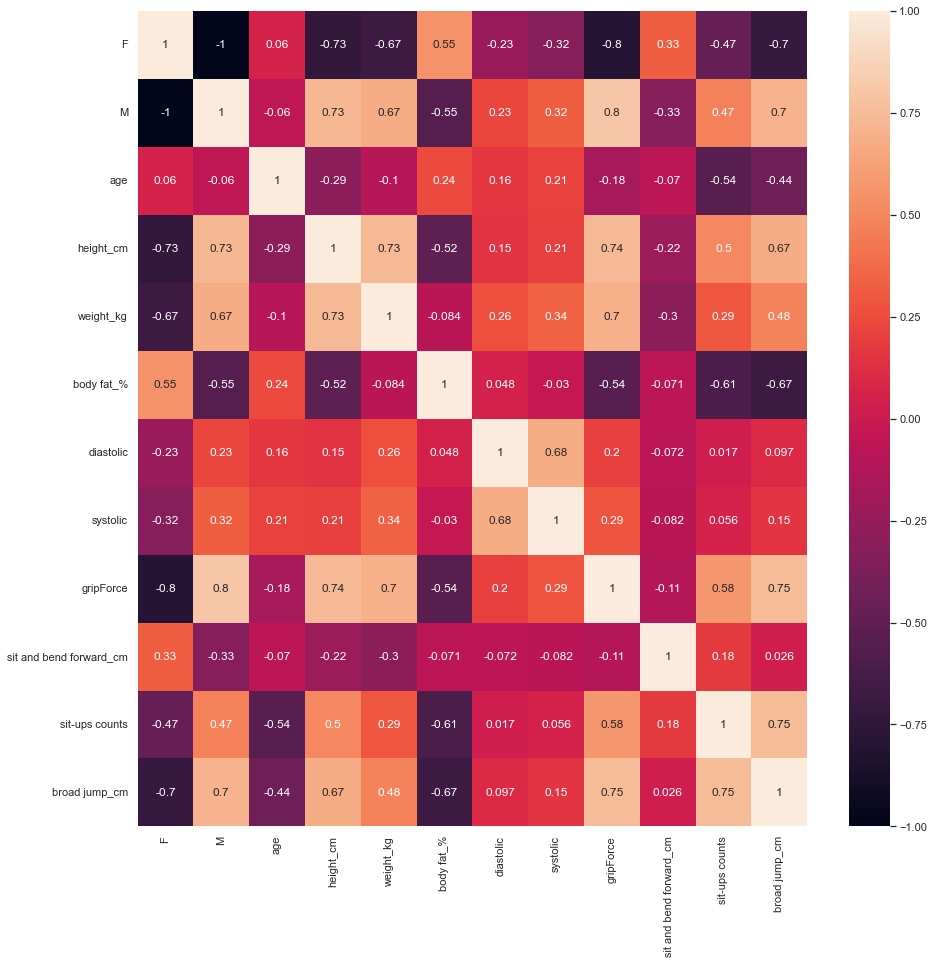

In [47]:
plt.figure(figsize=(15,15))
sns.heatmap(data_std.corr(),annot = True)

In [4]:
data.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [5]:
sns.set(rc={'figure.figsize':(14,6)})

## Gender
男生總體人數比女生多很多，但女性的class A比例較高，也就是若是女性則是class A的機率較高。

<AxesSubplot:xlabel='gender', ylabel='count'>

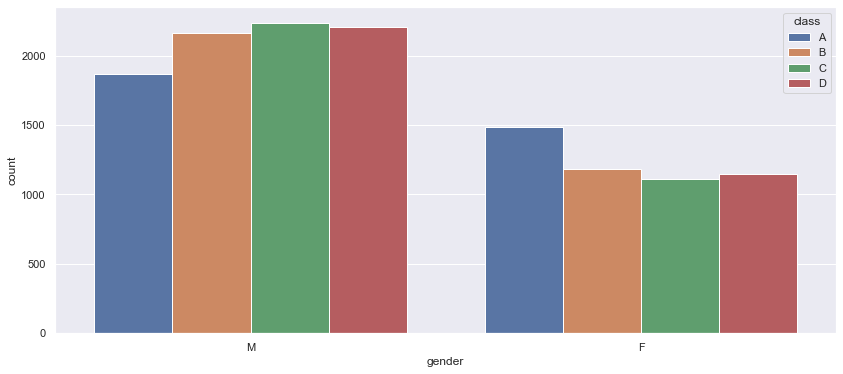

In [31]:
sns.countplot(data['gender'],hue=data['class'],hue_order=['A','B','C','D'])

## Age
20~30的人數明顯較多，且Class A在其中所佔的比例最高，但與其他年齡層相比也沒有超過很多，算是略有影響。

<AxesSubplot:xlabel='age_cut', ylabel='count'>

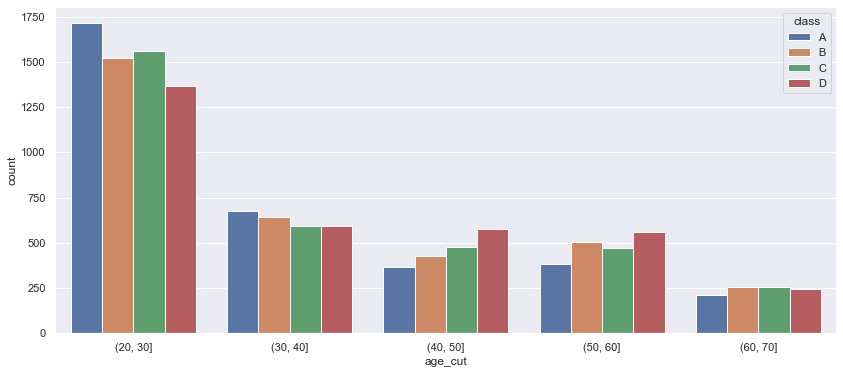

In [34]:
sns.countplot(data['age_cut'],hue=data['class'],hue_order=['A','B','C','D'])

<AxesSubplot:xlabel='gender', ylabel='count'>

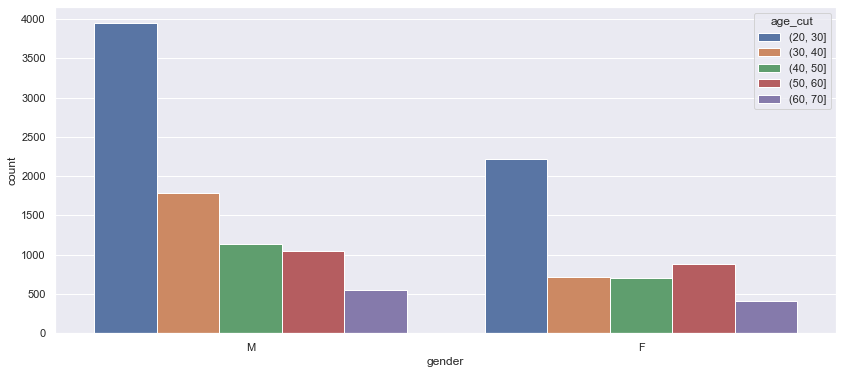

In [9]:
data['age_cut']=pd.cut(data['age'],[20,30,40,50,60,70])
sns.countplot(data['gender'],hue=data['age_cut'])

## Body fat_%
發現體脂率對於Class的影響非常大，越低的體脂率class A比例就越大，越高體脂率Class也明顯下降。

<AxesSubplot:xlabel='fat_cut', ylabel='count'>

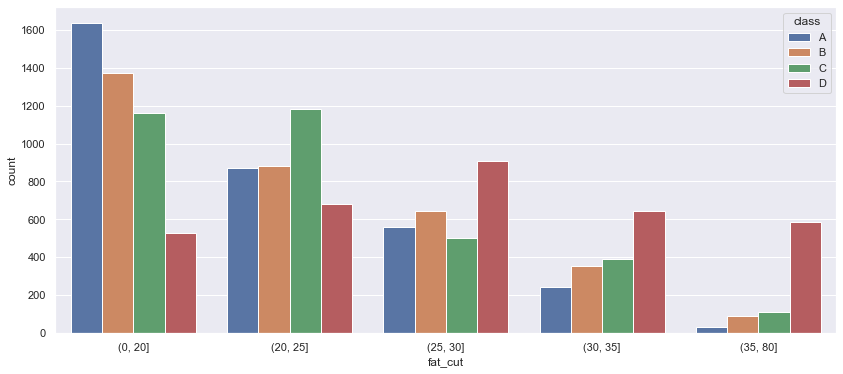

In [7]:
data['fat_cut']=pd.cut(data['body fat_%'],[0,20,25,30,35,80])
sns.countplot(data['fat_cut'],hue=data['class'],hue_order=['A','B','C','D'])

<AxesSubplot:xlabel='fat_cut', ylabel='count'>

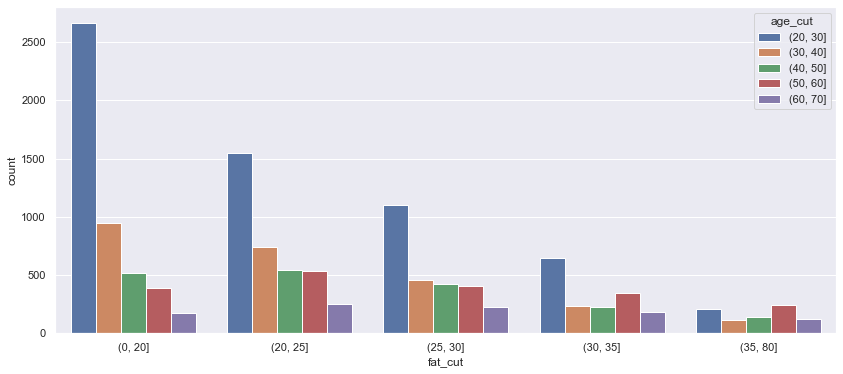

In [10]:
sns.countplot(data['fat_cut'],hue=data['age_cut'])

## Sit-ups count


<AxesSubplot:xlabel='class', ylabel='count'>

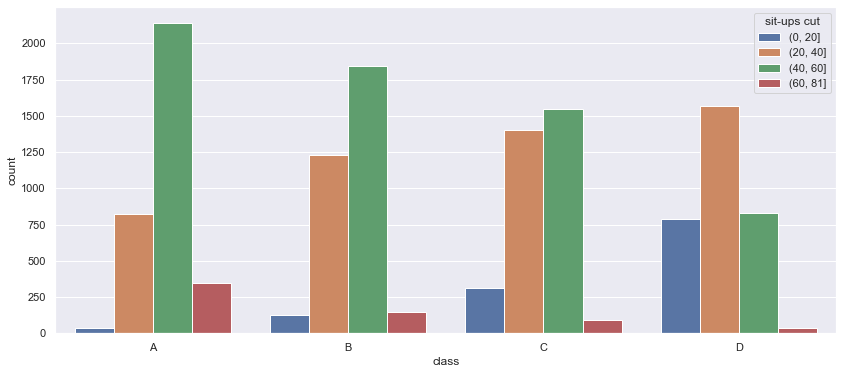

In [17]:
sns.countplot(data['class'],hue=data['sit-ups cut'],order=['A','B','C','D'])

<AxesSubplot:xlabel='age_cut', ylabel='count'>

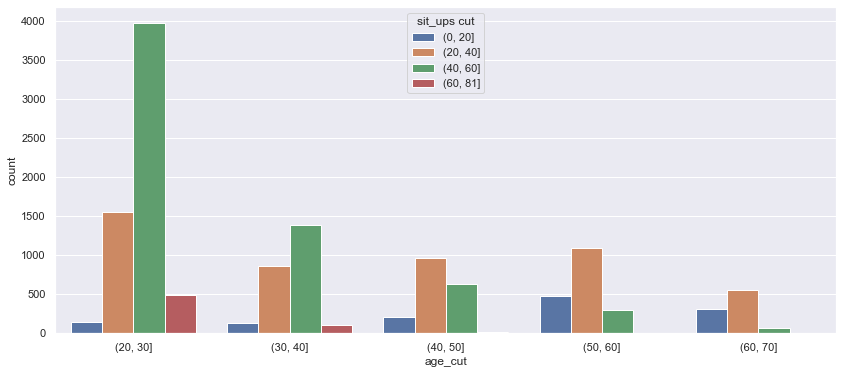

In [18]:
data['sit_ups cut']=pd.cut(data['sit-ups counts'],[0,20,40,60,81])
sns.countplot(data['age_cut'],hue=data['sit_ups cut'])

## sit and bend forward_cm

<AxesSubplot:xlabel='class', ylabel='count'>

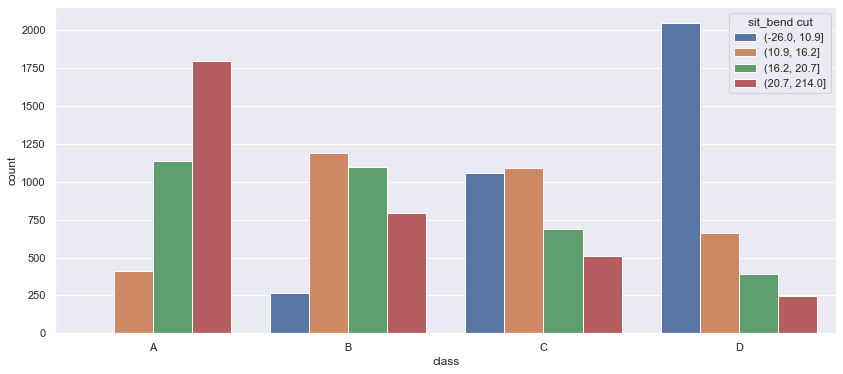

In [21]:
sns.countplot(data['class'],hue=data['sit_bend cut'],order=['A','B','C','D'])

<AxesSubplot:xlabel='age_cut', ylabel='count'>

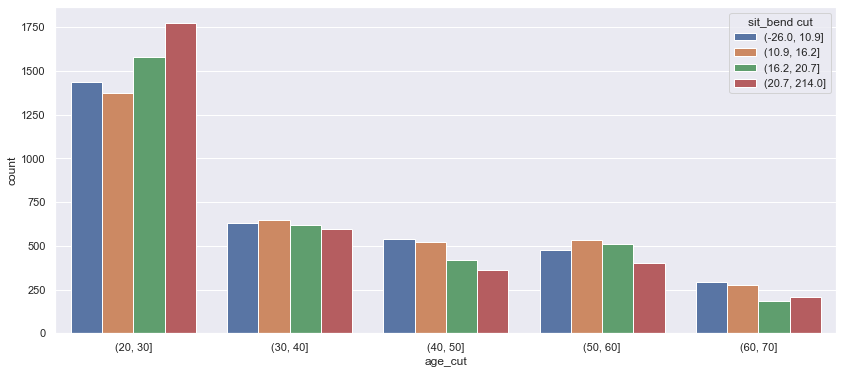

In [22]:
data['sit_bend cut']=pd.cut(data['sit and bend forward_cm'],[-26,10.9,16.2,20.7,214])
sns.countplot(data['age_cut'],hue=data['sit_bend cut'])

<AxesSubplot:xlabel='class', ylabel='age'>

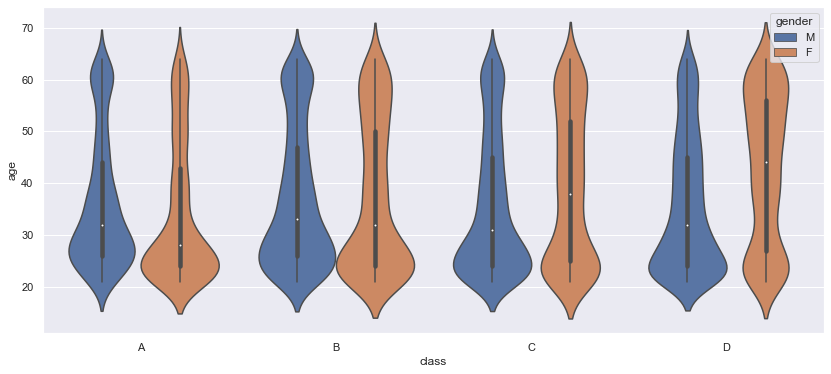

In [36]:
sns.violinplot(data['class'],data['age'],hue=data['gender'],order=['A','B','C','D'])

<AxesSubplot:xlabel='class', ylabel='sit and bend forward_cm'>

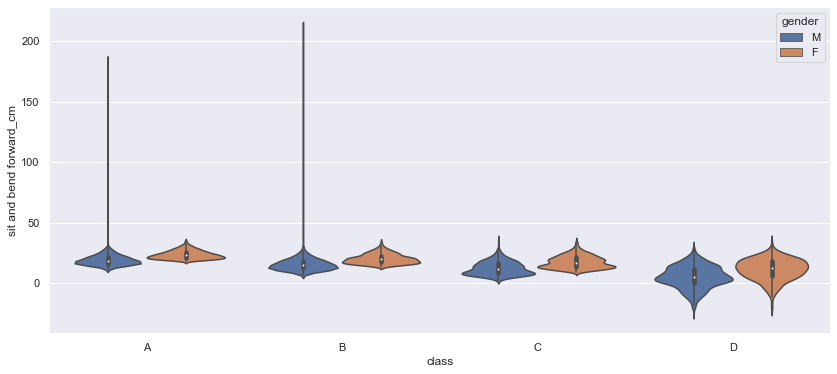

In [48]:
sns.violinplot(data['class'],data['sit and bend forward_cm'],hue=data['gender'],order=['A','B','C','D'])

<AxesSubplot:xlabel='class', ylabel='sit-ups counts'>

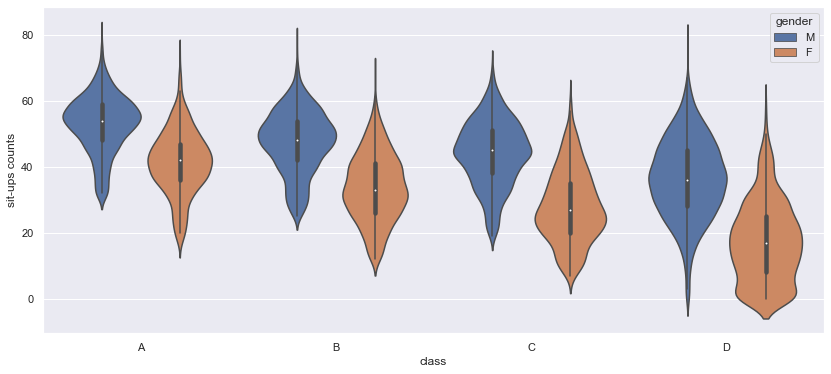

In [50]:
sns.violinplot(data['class'],data['sit-ups counts'],hue=data['gender'],order=['A','B','C','D'])

<AxesSubplot:xlabel='class', ylabel='body fat_%'>

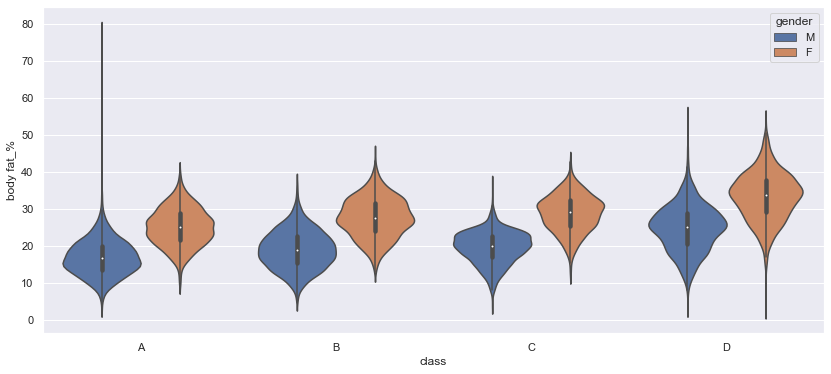

In [51]:
sns.violinplot(data['class'],data['body fat_%'],hue=data['gender'],order=['A','B','C','D'])

# Original Features
<font size="4">先將未經挑選的特徵算過運用各種model比較一遍

## LogisticRegression

In [11]:
lr = LogisticRegression(solver='lbfgs',multi_class='auto')
lr.fit(x_train,y_train)
print('train:',lr.score(x_train,y_train))
print('test:',lr.score(x_test,y_test))

train: 0.6269866666666667
test: 0.6030363364858138


<font size="4">運用一般的"Logistic Regression"分數大約落在0.6多且train與test差異不大。

## KNN

p=1,weights='uniform': 
for 1 points:  train: 1.0  test: 0.5485316077650573
for 11 points:  train: 0.696  test: 0.6219512195121951
for 21 points:  train: 0.6869333333333333  test: 0.6348929815828771
for 31 points:  train: 0.6753066666666667  test: 0.6371329019412643
for 41 points:  train: 0.67008  test: 0.6321553011448482


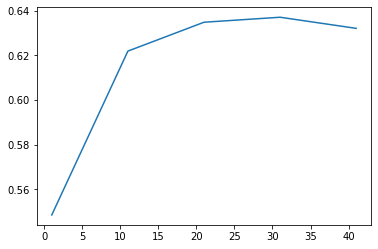

p=1,weights='distance': 
for 1 points:  train: 1.0  test: 0.5485316077650573
for 11 points:  train: 1.0  test: 0.627177700348432
for 21 points:  train: 1.0  test: 0.6386261821801892
for 31 points:  train: 1.0  test: 0.6426082628173221
for 41 points:  train: 1.0  test: 0.6403683424589348


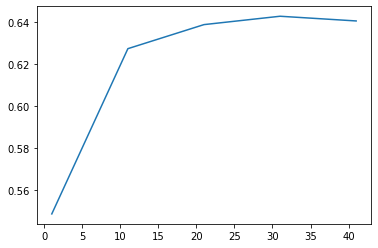

p=2,weights='uniform': 
for 1 points:  train: 1.0  test: 0.5542558486809358
for 11 points:  train: 0.6881066666666666  test: 0.6110004977600796
for 21 points:  train: 0.6688  test: 0.6124937779990045
for 31 points:  train: 0.6599466666666667  test: 0.6177202588352414
for 41 points:  train: 0.6519466666666667  test: 0.6152314584370333


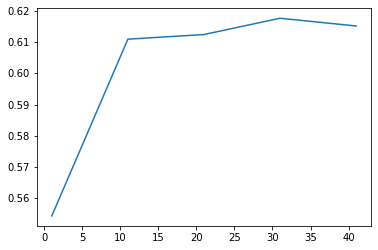

p=2,weights='distance': 
for 1 points:  train: 1.0  test: 0.5542558486809358
for 11 points:  train: 1.0  test: 0.618218018914883
for 21 points:  train: 1.0  test: 0.6204579392732703
for 31 points:  train: 1.0  test: 0.6281732205077153
for 41 points:  train: 1.0  test: 0.6204579392732703


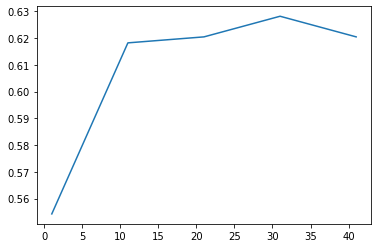

In [9]:
print("p=1,weights='uniform': ")
Score_clf = []
for m in range(1,51,10):#觀察鄰近點數量對模型影響
    clf = KNeighborsClassifier(n_neighbors=m,p=1,weights='uniform',algorithm='brute')
    clf.fit(x_train,y_train)
    print('for {} points:'.format(m),end='  ')
    print('train:',clf.score(x_train,y_train), end='  ')
    print('test:',clf.score(x_test,y_test))
    Score_clf.append(clf.score(x_test,y_test))
plt.plot(range(1,51,10),Score_clf)
plt.show()

print("p=1,weights='distance': ")
Score_clf = []
for m in range(1,51,10):#觀察鄰近點數量對模型影響
    #‘distance’ : weight points by the inverse of their distance. in this case, 
    #closer neighbors of a query point will have a greater influence than neighbors which are further away.
    clf = KNeighborsClassifier(n_neighbors=m,p=1,weights='distance',algorithm='brute')
    clf.fit(x_train,y_train)
    print('for {} points:'.format(m),end='  ')
    print('train:',clf.score(x_train,y_train), end='  ')
    print('test:',clf.score(x_test,y_test))
    Score_clf.append(clf.score(x_test,y_test))   
plt.plot(range(1,51,10),Score_clf)
plt.show()

print("p=2,weights='uniform': ")
Score_clf = []
for m in range(1,51,10):#觀察鄰近點數量對模型影響
    clf = KNeighborsClassifier(n_neighbors=m,p=2,weights='uniform',algorithm='brute')
    clf.fit(x_train,y_train)
    print('for {} points:'.format(m),end='  ')
    print('train:',clf.score(x_train,y_train), end='  ')
    print('test:',clf.score(x_test,y_test))
    Score_clf.append(clf.score(x_test,y_test))
plt.plot(range(1,51,10),Score_clf)
plt.show()

print("p=2,weights='distance': ")
Score_clf = []
for m in range(1,51,10):#觀察鄰近點數量對模型影響
    #‘distance’ : weight points by the inverse of their distance. in this case, 
    #closer neighbors of a query point will have a greater influence than neighbors which are further away.
    clf = KNeighborsClassifier(n_neighbors=m,p=2,weights='distance',algorithm='brute')
    clf.fit(x_train,y_train)
    print('for {} points:'.format(m),end='  ')
    print('train:',clf.score(x_train,y_train), end='  ')
    print('test:',clf.score(x_test,y_test))
    Score_clf.append(clf.score(x_test,y_test))   
plt.plot(range(1,51,10),Score_clf)
plt.show()

<font size="4">大概在考慮鄰近點十個點開始，準確率都會顯著提升，而權重選擇中，'distance'很容易造成overfitting，相對'uniform'就比較好。另外距離的算法'p=1(manhattan_distance)'會大體上優於'p=2(minkowski_distance)'。

## DecisionTree

criterion='entropy':
for 1 max_dapth:  train: 0.41408  test: 0.4051767048282728
for 2 max_dapth:  train: 0.47669333333333336  test: 0.46366351418616225
for 3 max_dapth:  train: 0.5674666666666667  test: 0.547536087605774
for 4 max_dapth:  train: 0.57312  test: 0.5487804878048781
for 5 max_dapth:  train: 0.5995733333333333  test: 0.5726729716276755
for 6 max_dapth:  train: 0.6314666666666666  test: 0.6085116973618716
for 7 max_dapth:  train: 0.6743466666666666  test: 0.6239422598307616
for 8 max_dapth:  train: 0.70912  test: 0.6455948232951717
for 9 max_dapth:  train: 0.7486933333333333  test: 0.6557989049278248
for 10 max_dapth:  train: 0.7844266666666667  test: 0.6587854654056745
for 11 max_dapth:  train: 0.8228266666666667  test: 0.6520657043305127
for 12 max_dapth:  train: 0.8628266666666666  test: 0.6475858636137382
for 13 max_dapth:  train: 0.9009066666666666  test: 0.6538078646092583
for 14 max_dapth:  train: 0.9323733333333334  test: 0.640119462419114
for 15 max_dapth:  train: 0

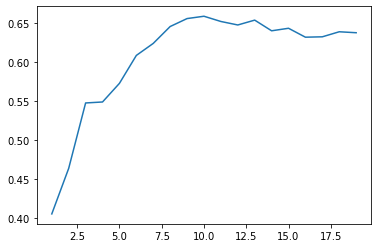

criterion='gini':
for 1 max_dapth:  train: 0.39253333333333335  test: 0.3845196615231458
for 2 max_dapth:  train: 0.47285333333333335  test: 0.4604280736684918
for 3 max_dapth:  train: 0.54944  test: 0.5365853658536586
for 4 max_dapth:  train: 0.5688533333333333  test: 0.5545047287207566
for 5 max_dapth:  train: 0.6120533333333333  test: 0.6057740169238427
for 6 max_dapth:  train: 0.6229333333333333  test: 0.5943255350920856
for 7 max_dapth:  train: 0.66272  test: 0.6296665007466401
for 8 max_dapth:  train: 0.7028266666666667  test: 0.6460925833748133
for 9 max_dapth:  train: 0.7383466666666667  test: 0.6572921851667496
for 10 max_dapth:  train: 0.7797333333333333  test: 0.6694873071179691
for 11 max_dapth:  train: 0.8200533333333333  test: 0.6714783474365356
for 12 max_dapth:  train: 0.86112  test: 0.6687406669985068
for 13 max_dapth:  train: 0.8965333333333333  test: 0.6612742658038825
for 14 max_dapth:  train: 0.9240533333333333  test: 0.6622697859631658
for 15 max_dapth:  train: 0.

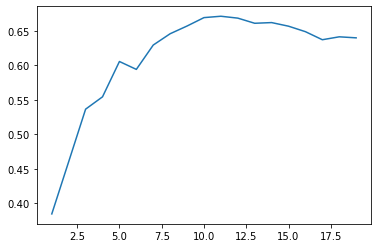

In [16]:
print("criterion='entropy':")
Score_clt = []
for m in range(1,20):
    clt = DecisionTreeClassifier(criterion='entropy',max_depth=m)
    clt.fit(x_train,y_train)
    print('for {} max_dapth:'.format(m),end='  ')
    print('train:',clt.score(x_train,y_train),end='  ')
    print('test:',clt.score(x_test,y_test))
    Score_clt.append(clt.score(x_test,y_test))
plt.plot(range(1,20),Score_clt)
plt.show()

print("criterion='gini':")
Score_clt = []
for m in range(1,20):
    clt = DecisionTreeClassifier(criterion='gini',max_depth=m)
    clt.fit(x_train,y_train)
    print('for {} max_dapth:'.format(m),end='  ')
    print('train:',clt.score(x_train,y_train),end='  ')
    print('test:',clt.score(x_test,y_test))
    Score_clt.append(clt.score(x_test,y_test))       
plt.plot(range(1,20),Score_clt)
plt.show()

<font size="4">在這裡比較不同深度的"decision tree"會發現當深度在10左右時準確率最好，且決策的選擇'gini'會稍稍優於'entropy'。

## RandomForest

for 1 trees:  train: 0.8411733333333333  test: 0.5512692882030861
for 21 trees:  train: 0.9986133333333334  test: 0.7110502737680438
for 41 trees:  train: 0.9998933333333333  test: 0.7207565953210553
for 61 trees:  train: 1.0  test: 0.7237431557989049
for 81 trees:  train: 1.0  test: 0.7244897959183674
for 101 trees:  train: 1.0  test: 0.7289696366351419
for 121 trees:  train: 1.0  test: 0.7297162767546043
for 141 trees:  train: 1.0  test: 0.7336983573917372
for 161 trees:  train: 1.0  test: 0.7317073170731707
for 181 trees:  train: 1.0  test: 0.732702837232454
for 201 trees:  train: 1.0  test: 0.7322050771528124


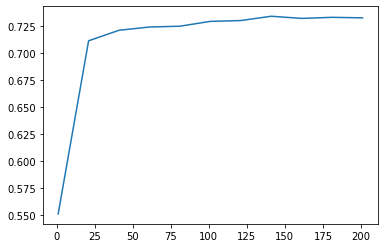

In [24]:
Score_clr = []
for m in range(1,202,20):    
    clr = RandomForestClassifier(criterion='entropy', n_estimators=m, random_state=100, n_jobs=8)
    clr.fit(x_train,y_train)
    print('for {} trees:'.format(m),end='  ')
    print('train:',clr.score(x_train,y_train),end='  ')
    print('test:',clr.score(x_test,y_test))
    Score_clr.append(clr.score(x_test,y_test))
                 
plt.plot(range(1,202,20),Score_clr)
plt.show()

for 1 trees:  train: 0.83584  test: 0.5368342458934794
for 101 trees:  train: 1.0  test: 0.7244897959183674
for 201 trees:  train: 1.0  test: 0.7332005973120955
for 301 trees:  train: 1.0  test: 0.7356893977103036
for 401 trees:  train: 1.0  test: 0.7356893977103036
for 501 trees:  train: 1.0  test: 0.735191637630662


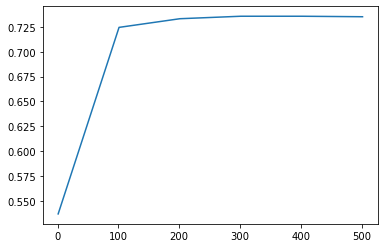

In [20]:
Score_clr = []
for m in range(1,502,100):    
    clr = RandomForestClassifier(criterion='gini', n_estimators=m, random_state=100, n_jobs=8)
    clr.fit(x_train,y_train)
    print('for {} trees:'.format(m),end='  ')
    print('train:',clr.score(x_train,y_train),end='  ')
    print('test:',clr.score(x_test,y_test))
    Score_clr.append(clr.score(x_test,y_test))
                 
plt.plot(range(1,502,100),Score_clr)
plt.show()

# Feature Selection

In [73]:
fss = fs.SelectKBest(fs.mutual_info_classif,k=12)
x_train_s1 = fss.fit(x_train,y_train)
x_train_s = x_train_s1.transform(x_train)
x_test_s = fss.transform(x_test)
x_train_s = pd.DataFrame(x_train_s, columns=x_train.columns[fss.get_support()])
x_test_s = pd.DataFrame(x_test_s, columns=x_train.columns[fss.get_support()])
print(fss.scores_)
x_train

[0.00233381 0.         0.01010021 0.01730117 0.03052833 0.08772295
 0.00179835 0.         0.03400942 0.29958954 0.13972867 0.06319448]


,F,M,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
1614,-0.762750,0.762750,-0.644038,0.230255,0.247103,-0.846152,0.391296,0.935554,0.229294,0.471921,0.856587,0.824511
6498,1.311045,-1.311045,-0.937613,0.313329,-0.932891,-1.094203,-1.470618,-1.511195,-0.222494,1.760891,0.786540,0.648925
5728,-0.762750,0.762750,1.484382,0.123446,0.397740,-0.184683,1.415349,1.343345,0.794028,0.471921,0.926634,0.623841
7342,1.311045,-1.311045,-0.864220,-0.481804,0.088096,2.130459,-0.260374,-0.491716,-0.373090,0.720254,0.786540,-0.580177
11632,-0.762750,0.762750,0.677050,0.954182,0.079728,-0.694565,-0.074183,0.663693,0.605783,0.247238,-0.124069,0.373004
...,...,...,...,...,...,...,...,...,...,...,...,...
79,1.311045,-1.311045,1.704563,-1.181995,-0.397291,1.565454,0.112009,0.459797,-0.721342,0.377317,-1.945286,-1.458107
12119,1.311045,-1.311045,-0.570645,-0.054568,-0.966366,-0.005535,1.229158,0.255902,-0.749579,0.448270,0.506353,-0.780847
8039,-0.762750,0.762750,0.603656,-0.102039,-0.079278,-0.611882,-1.191331,-0.083925,0.577546,-0.521414,-0.334209,-0.279172
6936,-0.762750,0.762750,-0.790826,0.182785,-0.405660,-1.480060,-0.539661,-0.287820,1.161105,0.318190,1.136774,1.175683


<font size="4">可以由'scores_'看出最重要的特徵是'sit and bend forward_cm'，'sit-ups counts'和'body fat_%'，而'sex'，'diastolic'，'systolic'則較不重要。

## LogisticRegression-Feature Selection change

for select 1 features:
train: 0.45482666666666666
test: 0.47112991538078647
Index(['sit and bend forward_cm'], dtype='object')
for select 2 features:
train: 0.5383466666666666
test: 0.5313588850174216
Index(['sit and bend forward_cm', 'sit-ups counts'], dtype='object')
for select 3 features:
train: 0.5483733333333334
test: 0.5423096067695371
Index(['body fat_%', 'sit and bend forward_cm', 'sit-ups counts'], dtype='object')
for select 4 features:
train: 0.5530666666666667
test: 0.5460428073668492
Index(['body fat_%', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm'],
      dtype='object')
for select 5 features:
train: 0.55072
test: 0.5423096067695371
Index(['body fat_%', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm'],
      dtype='object')
for select 6 features:
train: 0.57152
test: 0.5684420109507218
Index(['weight_kg', 'body fat_%', 'gripForce', 'sit and bend forward_cm',
       'sit-ups counts', 'broad jump_cm'],
      dtype='obje

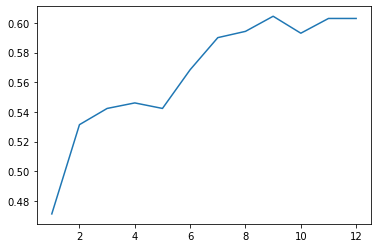

In [82]:
Score_lr_sc_total = []
for i in range(1,13,1):
    fssc = fs.SelectKBest(fs.mutual_info_classif,k=i)
    x_train_sc = fssc.fit_transform(x_train,y_train)
    x_test_sc = fssc.transform(x_test)
    x_train_sc = pd.DataFrame(x_train_sc, columns=x_train.columns[fssc.get_support()])
    x_test_sc = pd.DataFrame(x_test_sc, columns=x_train.columns[fssc.get_support()])
    lr_sc = LogisticRegression(solver='lbfgs',multi_class='auto')
    lr_sc.fit(x_train_sc,y_train)
    print('for select {} features:'.format(i))
    print('train:',lr_sc.score(x_train_sc,y_train))
    print('test:',lr_sc.score(x_test_sc,y_test))
    print(x_train_sc.columns)
    Score_lr_sc_total.append(lr_sc.score(x_test_sc,y_test))
    
plt.plot(range(1,13,1),Score_lr_sc_total)
plt.show()

for select 1 features:
train: 0.45482666666666666
test: 0.47112991538078647
Index(['sit and bend forward_cm'], dtype='object')
for select 2 features:
train: 0.5383466666666666
test: 0.5313588850174216
Index(['sit and bend forward_cm', 'sit-ups counts'], dtype='object')
for select 3 features:
train: 0.5483733333333334
test: 0.5423096067695371
Index(['body fat_%', 'sit and bend forward_cm', 'sit-ups counts'], dtype='object')
for select 4 features:
train: 0.5530666666666667
test: 0.5460428073668492
Index(['body fat_%', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm'],
      dtype='object')
for select 5 features:
train: 0.5637333333333333
test: 0.5612244897959183
Index(['weight_kg', 'body fat_%', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm'],
      dtype='object')
for select 6 features:
train: 0.57152
test: 0.5684420109507218
Index(['weight_kg', 'body fat_%', 'gripForce', 'sit and bend forward_cm',
       'sit-ups counts', 'broad jump_cm'],
      

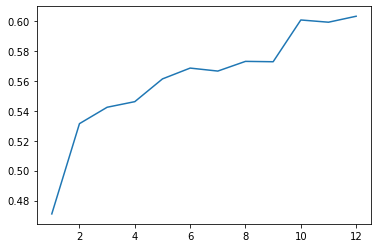

In [85]:
Score_lr_sc_total = []
for i in range(1,13,1):
    fssc = fs.SelectKBest(fs.f_classif,k=i)
    x_train_sc = fssc.fit_transform(x_train,y_train)
    x_test_sc = fssc.transform(x_test)
    x_train_sc = pd.DataFrame(x_train_sc, columns=x_train.columns[fssc.get_support()])
    x_test_sc = pd.DataFrame(x_test_sc, columns=x_train.columns[fssc.get_support()])
    lr_sc = LogisticRegression(solver='lbfgs',multi_class='auto')
    lr_sc.fit(x_train_sc,y_train)
    print('for select {} features:'.format(i))
    print('train:',lr_sc.score(x_train_sc,y_train))
    print('test:',lr_sc.score(x_test_sc,y_test))
    print(x_train_sc.columns)
    Score_lr_sc_total.append(lr_sc.score(x_test_sc,y_test))
    
plt.plot(range(1,13,1),Score_lr_sc_total)
plt.show()

<font size='4'>這裡發現對於'LogisticRegression'來說，'Featrue Selection'在選到10個特徵之後就差不多，且與原分數也沒有差很多，效益不大，且對兩種不同'score funciton'差異不大。

## KNN-Feature Selection change

In [87]:
Score_clf_sc_total = []
for i in range(1,13,1):
    fssc = fs.SelectKBest(fs.mutual_info_classif,k=i)
    x_train_sc = fssc.fit_transform(x_train,y_train)
    x_test_sc = fssc.transform(x_test)
    print('for select {} features:'.format(i))
    Score_clf_sc = []
    for m in range(10,51,10):
        clf_sc = KNeighborsClassifier(n_neighbors=m,p=1,weights='uniform',algorithm='brute')
        clf_sc.fit(x_train_sc,y_train)
        print('for {} points:'.format(m),end='  ')
        print('train:',clf_sc.score(x_train_sc,y_train),end='  ')
        print('test',clf_sc.score(x_test_sc,y_test))
        Score_clf_sc.append(clf_sc.score(x_test_sc,y_test))
    Score_clf_sc_total.append(Score_clf_sc)

for select 1 features:
for 10 points:  train: 0.47701333333333334  test 0.4611747137879542
for 20 points:  train: 0.4939733333333333  test 0.4793429566948731
for 30 points:  train: 0.4997333333333333  test 0.476854156296665
for 40 points:  train: 0.50144  test 0.47834743653558986
for 50 points:  train: 0.5012266666666667  test 0.4753608760577402
for select 2 features:
for 10 points:  train: 0.6292266666666667  test 0.5440517670482827
for 20 points:  train: 0.6018133333333333  test 0.5520159283225485
for 30 points:  train: 0.59872  test 0.5637132901941264
for 40 points:  train: 0.58848  test 0.5771528123444499
for 50 points:  train: 0.58976  test 0.5778994524639124
for select 3 features:
for 10 points:  train: 0.64896  test 0.5711796913887506
for 20 points:  train: 0.6261333333333333  test 0.5866102538576407
for 30 points:  train: 0.6146133333333333  test 0.5871080139372822
for 40 points:  train: 0.60736  test 0.5935788949726232
for 50 points:  train: 0.60384  test 0.5923344947735192
fo

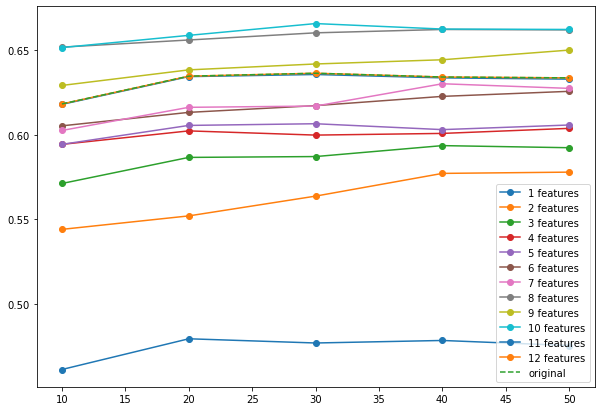

In [95]:
Score_clf = []
for m in range(10,51,10):#觀察鄰近點數量對模型影響
    clf = KNeighborsClassifier(n_neighbors=m,p=1,weights='uniform',algorithm='brute')
    clf.fit(x_train,y_train)
    Score_clf.append(clf.score(x_test,y_test))

plt.figure(figsize=(10,7))
for i in range(len(Score_clf_sc_total)):
    plt.plot(range(10,51,10),Score_clf_sc_total[i],"o-",label='{} features'.format(i+1))
plt.plot(range(10,51,10),Score_clf,"--",label='original')
plt.legend(loc='best')
plt.show()

<font size='4'>這裡發現'Feature Selection'對KNN來說確實有提升的效果，只取十個Features會比取全部來的精準，且前三項features也與上方的score有所對應。

## Decision Tree-Feature Selection change

In [101]:
Score_clt_sc_total = []
for i in range(1,13,1):
    fssc = fs.SelectKBest(fs.mutual_info_classif,k=i)
    x_train_sc = fssc.fit_transform(x_train,y_train)
    x_test_sc = fssc.transform(x_test)
    print('for select {} features:'.format(i))
    Score_clt_sc = []
    for m in range(1,20):
        clt_sc = DecisionTreeClassifier(criterion='gini',max_depth=m)
        clt_sc.fit(x_train_sc,y_train)
        print('for {} max_dapth:'.format(m),end='  ')
        print('train:',clt_sc.score(x_train_sc,y_train),end='  ')
        print('test',clt_sc.score(x_test_sc,y_test))
        Score_clt_sc.append(clt_sc.score(x_test_sc,y_test))
    Score_clt_sc_total.append(Score_clt_sc)

for select 1 features:
for 1 max_dapth:  train: 0.39253333333333335  test 0.3845196615231458
for 2 max_dapth:  train: 0.47285333333333335  test 0.4604280736684918
for 3 max_dapth:  train: 0.4843733333333333  test 0.4917869586859134
for 4 max_dapth:  train: 0.49205333333333334  test 0.49153807864609256
for 5 max_dapth:  train: 0.49418666666666666  test 0.491040318566451
for 6 max_dapth:  train: 0.49717333333333336  test 0.4912891986062718
for 7 max_dapth:  train: 0.4994133333333333  test 0.4873071179691389
for 8 max_dapth:  train: 0.50304  test 0.47909407665505227
for 9 max_dapth:  train: 0.5045333333333333  test 0.4798407167745147
for 10 max_dapth:  train: 0.50656  test 0.4763563962170234
for 11 max_dapth:  train: 0.5080533333333334  test 0.4753608760577402
for 12 max_dapth:  train: 0.5082666666666666  test 0.4738675958188153
for 13 max_dapth:  train: 0.50848  test 0.4736187157789945
for 14 max_dapth:  train: 0.5086933333333333  test 0.4736187157789945
for 15 max_dapth:  train: 0.5088 

for 10 max_dapth:  train: 0.77504  test 0.6650074664011946
for 11 max_dapth:  train: 0.8130133333333334  test 0.6717272274763564
for 12 max_dapth:  train: 0.85184  test 0.6699850671976108
for 13 max_dapth:  train: 0.8885333333333333  test 0.6684917869586859
for 14 max_dapth:  train: 0.9176533333333333  test 0.6660029865604778
for 15 max_dapth:  train: 0.9454933333333333  test 0.6562966650074664
for 16 max_dapth:  train: 0.96288  test 0.6485813837730214
for 17 max_dapth:  train: 0.9767466666666667  test 0.6493280238924838
for 18 max_dapth:  train: 0.9854933333333333  test 0.6441015430562469
for 19 max_dapth:  train: 0.9904  test 0.6431060228969636
for select 8 features:
for 1 max_dapth:  train: 0.39253333333333335  test 0.3845196615231458
for 2 max_dapth:  train: 0.47285333333333335  test 0.4604280736684918
for 3 max_dapth:  train: 0.54944  test 0.5365853658536586
for 4 max_dapth:  train: 0.5688533333333333  test 0.5545047287207566
for 5 max_dapth:  train: 0.6120533333333333  test 0.605

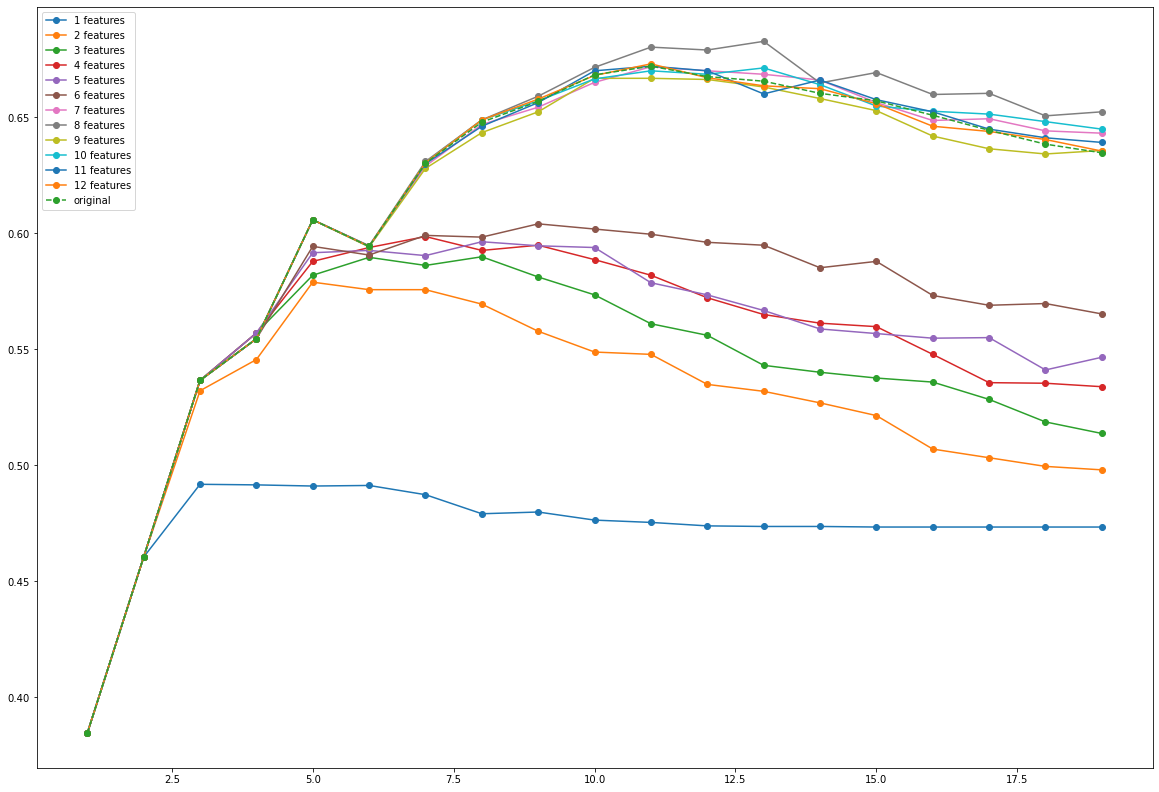

In [103]:
Score_clt = []
for m in range(1,20):
    clt = DecisionTreeClassifier(criterion='gini',max_depth=m)
    clt.fit(x_train,y_train)
    Score_clt.append(clt.score(x_test,y_test))

plt.figure(figsize=(20,14))
for i in range(len(Score_clt_sc_total)):
    plt.plot(range(1,20),Score_clt_sc_total[i],"o-",label='{} features'.format((i+1)))
plt.plot(range(1,20),Score_clt,"o--",label='original')
plt.legend(loc='best')
plt.show()

<font size='4'>同樣在'Decision Tree'中'Feature Selection'可以讓準去度提升，且隨著Features的數量不同，最佳解的Decision tree的深度也有所不同。

## Ramdom forest-Feature Selection change

In [104]:
Score_clr_sc_total = []
for i in range(1,13,1):
    fssc = fs.SelectKBest(fs.mutual_info_classif,k=i)
    x_train_sc = fssc.fit_transform(x_train,y_train)
    x_test_sc = fssc.transform(x_test)
    print('for select {} features:'.format(i))
    Score_clr_sc = []
    for m in range(1,502,100):    
        clr_sc = RandomForestClassifier(criterion='gini', n_estimators=m, random_state=100, n_jobs=8)
        clr_sc.fit(x_train_sc,y_train)
        print('for {} trees:'.format(m),end='  ')
        print('train:',clr_sc.score(x_train_sc,y_train),end='  ')
        print('test',clr_sc.score(x_test_sc,y_test))
        Score_clr_sc.append(clr_sc.score(x_test_sc,y_test))
    Score_clr_sc_total.append(Score_clr_sc)

for select 1 features:
for 1 trees:  train: 0.49621333333333334  test 0.4586859133897461
for 101 trees:  train: 0.5088  test 0.4718765555002489
for 201 trees:  train: 0.5089066666666666  test 0.4726231956197113
for 301 trees:  train: 0.5089066666666666  test 0.4728720756595321
for 401 trees:  train: 0.5089066666666666  test 0.4758586361373818
for 501 trees:  train: 0.5089066666666666  test 0.47336983573917374
for select 2 features:
for 1 trees:  train: 0.7416533333333334  test 0.47909407665505227
for 101 trees:  train: 0.8557866666666667  test 0.49552015928322546
for 201 trees:  train: 0.8557866666666667  test 0.4975111996017919
for 301 trees:  train: 0.8557866666666667  test 0.4950223992035839
for 401 trees:  train: 0.8557866666666667  test 0.4952712792434047
for 501 trees:  train: 0.8557866666666667  test 0.4930313588850174
for select 3 features:
for 1 trees:  train: 0.8122666666666667  test 0.4965156794425087
for 101 trees:  train: 0.99904  test 0.5624688899950224
for 201 trees:  tr

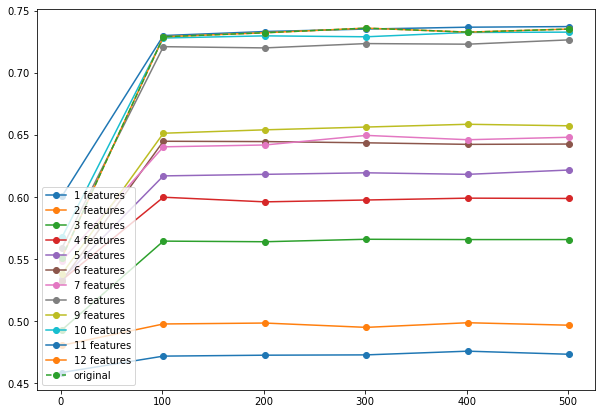

In [100]:
Score_clr = []
for m in range(1,502,100):    
    clr = RandomForestClassifier(criterion='entropy', n_estimators=m, random_state=100, n_jobs=8)
    clr.fit(x_train,y_train)
    Score_clr.append(clr.score(x_test,y_test))

plt.figure(figsize=(10,7))
for i in range(len(Score_clr_sc_total)):
    plt.plot(range(1,502,100),Score_clr_sc_total[i],"o-",label='{} features'.format((i+1)))
plt.plot(range(1,502,100),Score_clr,"o--",label='original')
plt.legend(loc='lower left')
plt.show()

<font size='4'>對於'Random forest'來說，原本準確率就較高，對於這樣的情況，'Feature Selection'並沒有提升多少。

PCA Change
==

Logistic Regression-PCA Change
--

for 1 components:  train: 0.24586666666666668  test: 0.22150323544051767
for 2 components:  train: 0.38634666666666667  test: 0.3827775012444002
for 3 components:  train: 0.5008  test: 0.5039820806371329
for 4 components:  train: 0.5499733333333333  test: 0.5373320059731209
for 5 components:  train: 0.5810133333333334  test: 0.5739173718267795
for 6 components:  train: 0.5890133333333334  test: 0.5808860129417621
for 7 components:  train: 0.5901866666666666  test: 0.5826281732205078
for 8 components:  train: 0.6148266666666666  test: 0.5968143354902937
for 9 components:  train: 0.61792  test: 0.5943255350920856
for 10 components:  train: 0.6222933333333334  test: 0.6017919362867098
for 11 components:  train: 0.6269866666666667  test: 0.6030363364858138
for 12 components:  train: 0.6269866666666667  test: 0.6030363364858138


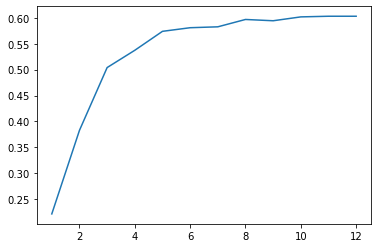

In [29]:
Score_lr_pc_total = []
for i in range(1,13,1):
    pcac = PCA(n_components=i)
    x_train_pc = pcac.fit_transform(x_train)
    x_test_pc = pcac.transform(x_test)
    lr_pc = LogisticRegression(solver='lbfgs',multi_class='auto')
    lr_pc.fit(x_train_pc,y_train)
    print('for {} components:'.format(i),end='  ')
    print('train:',lr_pc.score(x_train_pc,y_train),end='  ')
    print('test:',lr_pc.score(x_test_pc,y_test))
    Score_lr_pc_total.append(lr_pc.score(x_test_pc,y_test))
    
plt.plot(range(1,13,1),Score_lr_pc_total)
plt.show()

KNN-PCA Change
--

In [112]:
Score_clf_pc_total = []
for i in range(1,13,1):
    pcac = PCA(n_components=i)
    x_train_pc = pcac.fit_transform(x_train)
    x_test_pc = pcac.transform(x_test)
    print('for {} components:'.format(i))
    Score_clf_pc = []
    for m in range(10,51,10):
        clf_pc = KNeighborsClassifier(n_neighbors=m,p=2,weights='distance',algorithm='brute')
        clf_pc.fit(x_train_pc,y_train)
        print('for {} points:'.format(m),end='  ')
        print('train:',clf_pc.score(x_train_pc,y_train),end='  ')
        print('test',clf_pc.score(x_test_pc,y_test))
        Score_clf_pc.append(clf_pc.score(x_test_pc,y_test))
    Score_clf_pc_total.append(Score_clf_pc)

for 1 components:
for 10 points:  train: 1.0  test 0.29915380786460927
for 20 points:  train: 1.0  test 0.30238924838227976
for 30 points:  train: 1.0  test 0.30288700846192135
for 40 points:  train: 1.0  test 0.30288700846192135
for 50 points:  train: 1.0  test 0.3048780487804878
for 2 components:
for 10 points:  train: 1.0  test 0.36112493777999005
for 20 points:  train: 1.0  test 0.3782976605276257
for 30 points:  train: 1.0  test 0.3837730214036834
for 40 points:  train: 1.0  test 0.38725734196117473
for 50 points:  train: 1.0  test 0.38800398208063713
for 3 components:
for 10 points:  train: 1.0  test 0.4634146341463415
for 20 points:  train: 1.0  test 0.4848183175709308
for 30 points:  train: 1.0  test 0.49402687904430065
for 40 points:  train: 1.0  test 0.5024888003982081
for 50 points:  train: 1.0  test 0.506470881035341
for 4 components:
for 10 points:  train: 1.0  test 0.5303633648581384
for 20 points:  train: 1.0  test 0.5380786460925834
for 30 points:  train: 1.0  test 0.54

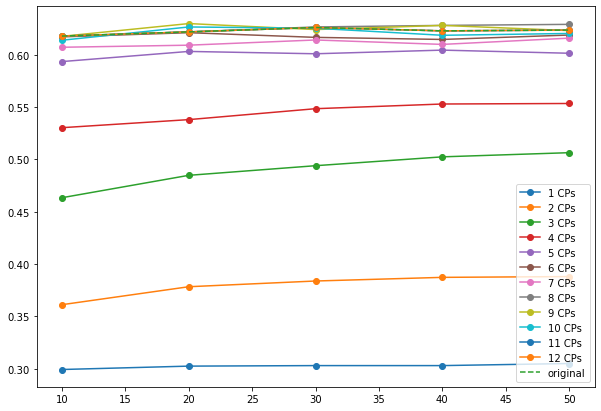

In [115]:
Score_clf = []
for m in range(10,51,10):#觀察鄰近點數量對模型影響
    clf = KNeighborsClassifier(n_neighbors=m,p=2,weights='distance',algorithm='brute')
    clf.fit(x_train,y_train)
    Score_clf.append(clf.score(x_test,y_test))
    
plt.figure(figsize=(10,7))
for i in range(len(Score_clf_pc_total)):
    plt.plot(range(10,51,10),Score_clf_pc_total[i],"o-",label='{} CPs'.format(i+1))
plt.plot(range(10,51,10),Score_clf,"--",label='original')
plt.legend(loc='best')
plt.show()

In [32]:
Score_clt_pc_total = []
for i in range(1,13,1):
    pcac = PCA(n_components=i)
    x_train_pc = pcac.fit_transform(x_train)
    x_test_pc = pcac.transform(x_test)
    print('for {} components:'.format(i))
    Score_clt_pc = []
    for m in range(1,20):
        clt_pc = DecisionTreeClassifier(criterion='entropy',max_depth=m)
        clt_pc.fit(x_train_pc,y_train)
        print('for {} points:'.format(m),end='  ')
        print('train:',clt_pc.score(x_train_pc,y_train),end='  ')
        print('test',clt_pc.score(x_test_pc,y_test))
        Score_clt_pc.append(clt_pc.score(x_test_pc,y_test))
    Score_clt_pc_total.append(Score_clt_pc)

for 1 components:
for 1 points:  train: 0.29045333333333334  test 0.27899452463912394
for 2 points:  train: 0.3072  test 0.30761572921851665
for 3 points:  train: 0.3613866666666667  test 0.34519661523145845
for 4 points:  train: 0.3698133333333333  test 0.36037829766052765
for 5 points:  train: 0.37216  test 0.35390741662518665
for 6 points:  train: 0.38037333333333334  test 0.3511697361871578
for 7 points:  train: 0.3889066666666667  test 0.350920856147337
for 8 points:  train: 0.39754666666666666  test 0.350920856147337
for 9 points:  train: 0.40853333333333336  test 0.34942757590841217
for 10 points:  train: 0.42186666666666667  test 0.35365853658536583
for 11 points:  train: 0.43968  test 0.3446988551518168
for 12 points:  train: 0.45888  test 0.34196117471378795
for 13 points:  train: 0.47829333333333335  test 0.34121453459432555
for 14 points:  train: 0.5041066666666667  test 0.335490293678447
for 15 points:  train: 0.5252266666666666  test 0.33325037332005975
for 16 points:  tr

for 15 points:  train: 0.94592  test 0.5214036834245893
for 16 points:  train: 0.9669333333333333  test 0.5161772025883524
for 17 points:  train: 0.9790933333333334  test 0.5184171229467397
for 18 points:  train: 0.98784  test 0.512941762070682
for 19 points:  train: 0.9934933333333333  test 0.5166749626679941
for 8 components:
for 1 points:  train: 0.38453333333333334  test 0.374066699850672
for 2 points:  train: 0.43061333333333335  test 0.4123942259830762
for 3 points:  train: 0.4842666666666667  test 0.4659034345445495
for 4 points:  train: 0.5080533333333334  test 0.47486311597809855
for 5 points:  train: 0.5402666666666667  test 0.5087108013937283
for 6 points:  train: 0.5896533333333334  test 0.5450472872075659
for 7 points:  train: 0.6218666666666667  test 0.5597312095569935
for 8 points:  train: 0.6562133333333333  test 0.5637132901941264
for 9 points:  train: 0.69696  test 0.5778994524639124
for 10 points:  train: 0.7415466666666667  test 0.579641612742658
for 11 points:  tra

Decision Tree-PCA Change
--

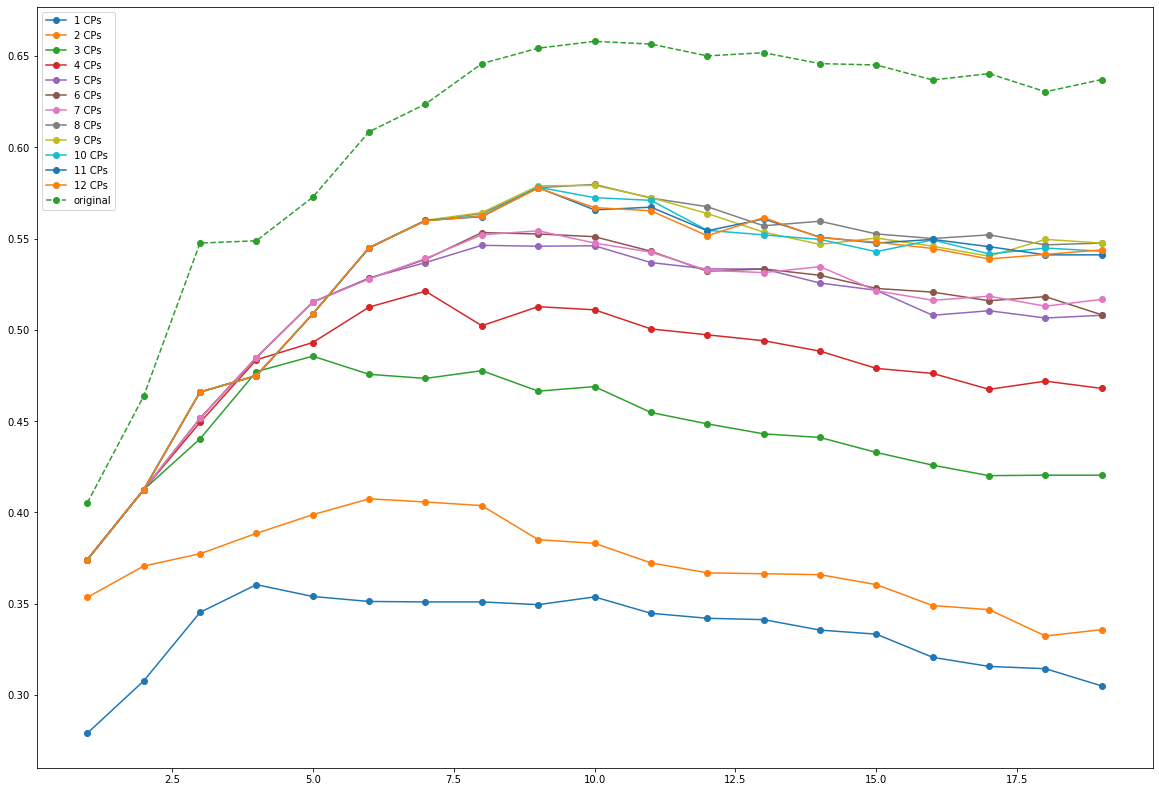

In [33]:
Score_clt = []
for m in range(1,20):
    clt = DecisionTreeClassifier(criterion='entropy',max_depth=m)
    clt.fit(x_train,y_train)
#     print('for {} max_dapth:'.format(m),end='  ')
#     print('train:',clt.score(x_train,y_train),end='  ')
#     print('test:',clt.score(x_test,y_test))
    Score_clt.append(clt.score(x_test,y_test))

plt.figure(figsize=(20,14))
for i in range(len(Score_clt_pc_total)):
    plt.plot(range(1,20),Score_clt_pc_total[i],"o-",label='{} CPs'.format(i+1))
plt.plot(range(1,20),Score_clt,"o--",label='original')
plt.legend(loc='best')
plt.show()

Random Forest-PCA Change
--

In [34]:
Score_clr_pc_total = []
for i in range(1,13,1):
    fspc = fs.SelectPercentile(fs.mutual_info_classif,percentile=i)
    x_train_pc = fspc.fit_transform(x_train,y_train)
    x_test_pc = fspc.transform(x_test)
    print('for {} components:'.format(i))
    Score_clr_pc = []
    for m in range(1,502,100):    
        clr_pc = RandomForestClassifier(criterion='entropy', n_estimators=m, random_state=100, n_jobs=8)
        clr_pc.fit(x_train_pc,y_train)
        print('for {} trees:'.format(m),end='  ')
        print('train:',clr_pc.score(x_train_pc,y_train),end='  ')
        print('test',clr_pc.score(x_test_pc,y_test))
        Score_clr_pc.append(clr_pc.score(x_test_pc,y_test))
    Score_clr_pc_total.append(Score_clr_pc)

for 1 components:
for 1 trees:  train: 0.49621333333333334  test 0.4586859133897461
for 101 trees:  train: 0.5088  test 0.4718765555002489
for 201 trees:  train: 0.5089066666666666  test 0.4726231956197113
for 301 trees:  train: 0.5089066666666666  test 0.4728720756595321
for 401 trees:  train: 0.5089066666666666  test 0.4758586361373818
for 501 trees:  train: 0.5089066666666666  test 0.47336983573917374
for 2 components:
for 1 trees:  train: 0.49621333333333334  test 0.4586859133897461
for 101 trees:  train: 0.5088  test 0.4718765555002489
for 201 trees:  train: 0.5089066666666666  test 0.4726231956197113
for 301 trees:  train: 0.5089066666666666  test 0.4728720756595321
for 401 trees:  train: 0.5089066666666666  test 0.4758586361373818
for 501 trees:  train: 0.5089066666666666  test 0.47336983573917374
for 3 components:
for 1 trees:  train: 0.49621333333333334  test 0.4586859133897461
for 101 trees:  train: 0.5088  test 0.4718765555002489
for 201 trees:  train: 0.5089066666666666  te

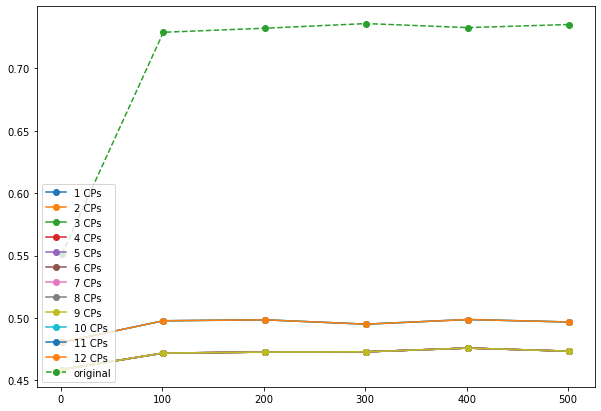

In [35]:
Score_clr = []
for m in range(1,502,100):    
    clr = RandomForestClassifier(criterion='entropy', n_estimators=m, random_state=100, n_jobs=8)
    clr.fit(x_train,y_train)
    Score_clr.append(clr.score(x_test,y_test))

plt.figure(figsize=(10,7))
for i in range(len(Score_clr_pc_total)):
    plt.plot(range(1,502,100),Score_clr_pc_total[i],"o-",label='{} CPs'.format(i+1))
plt.plot(range(1,502,100),Score_clr,"o--",label='original')
plt.legend(loc='lower left')
plt.show()